In [1]:
# Import Keras Stuff
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [2]:
# Other Stuff
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
def get_preprocessed_image(image):
    # Extract the face ROI, convert it from BGR to RGB channel ordering, resize it, and preprocess it
    final_image = image
    # final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
    final_image = cv2.resize(image, (224, 224))
    final_image = img_to_array(final_image)
    final_image = preprocess_input(final_image)
    return final_image

In [4]:
# Load the model
model = load_model('thermal_mask_detector.model')

In [5]:
# Paths for the image - mask1.jpg and no_mask1.jpg (1-6)
image_path = 'examples/no_mask1.jpg'

In [6]:
# Load the image, and grab the dimensions
image = cv2.imread(image_path)
h, w = image.shape[:2]
startX, startY, endX, endY = 10, 0, w - 11, h - 1
preprocessed_img = get_preprocessed_image(image[startY:endY,startX:endX])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


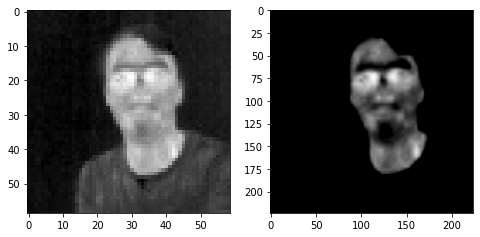

In [7]:
# Input Image / Preprocess Image
figure, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].imshow(image[startY:endY,startX:endX])
axis[1].imshow(preprocessed_img)

In [8]:
# Make the prediction
mask, no_mask = model.predict(np.expand_dims(preprocessed_img, axis=0))[0]
print(f'Mask: {mask:0.2f}, No Mask: {no_mask:0.2f}')

Mask: 0.00, No Mask: 1.00
